## Analyzing Financial Data in Python

Example taken from https://towardsdatascience.com/analyzing-financial-data-in-python-ccf5c99f55e8

In [84]:
import pandas_datareader.data as web
#Python library that allows users easy access to stock price data and to perform 
#statistical analysis

import datetime
from datetime import date
#Datetime package that allows creation of Python datetime objects

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#Use for plotting the data

import numpy as np

### Importing Stock Data
If you wish to find the name of the stock search for the company in https://finance.yahoo.com/quote/SSE.L?p=SSE.L&.tsrc=fin-srch

In [85]:
start = datetime.datetime(2010,1,1)
end = date.today()

sse = web.DataReader('SSE.L', 'yahoo',start,end)
edf = web.DataReader('EDF.PA', 'yahoo',start,end)
orsted = web.DataReader('ORSTED.CO', 'yahoo',start,end)

Save the data to a csv file

In [86]:
sse.to_csv('C:/Work/Datasets/StockData/sse_stocks.csv')
edf.to_csv('C:/Work/Datasets/StockData/edf_stocks.csv')
orsted.to_csv('C:/Work/Datasets/StockData/orsted_stocks.csv')

Read the files into Pandas dataframes

In [87]:
sse_df = pd.read_csv('C:/Work/Datasets/StockData/sse_stocks.csv')
edf_df = pd.read_csv('C:/Work/Datasets/StockData/edf_stocks.csv')
orsted_df = pd.read_csv('C:/Work/Datasets/StockData/orsted_stocks.csv')

### Generating Return Statistics from the Stock Data
This code will generate some simple statistics using the stock data.

**Return** The opening price minus the closing price divided by the opening price.

In [88]:
def returns(df):
    df['Returns'] = (df['Close'] - df['Open'])/df['Open']
    return df

sse_df = returns(sse_df)
edf_df = returns(edf_df)
orsted_df = returns(orsted_df)

Plot the data within a histogram

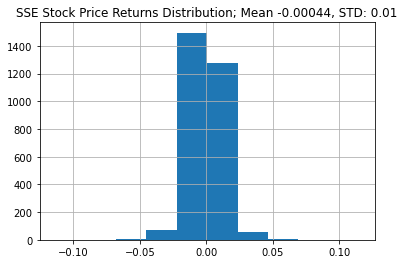

In [89]:
sse_df['Returns'].hist()
mean_sse_returns = np.round(sse_df['Returns'].mean(), 5)
std_sse_returns = np.round(sse_df['Returns'].std(), 2)

plt.title(f'SSE Stock Price Returns Distribution; Mean {mean_sse_returns}, STD: {std_sse_returns}')
plt.show()

Plotting the different distributions as box plots

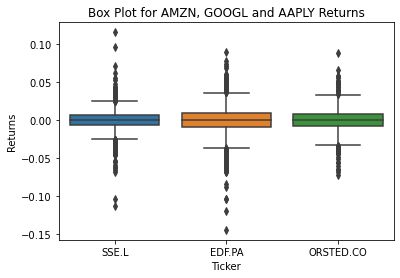

In [90]:
sse_df['Ticker'] = 'SSE.L'
edf_df['Ticker'] = 'EDF.PA'
orsted_df['Ticker'] = 'ORSTED.CO'

#Create one dataframe containing the returns for all the stocks
df = pd.concat([sse_df, edf_df, orsted_df])
df = df[['Ticker', 'Returns']]

sns.boxplot(x = df['Ticker'], y = df['Returns'])
plt.title('Box Plot for AMZN, GOOGL and AAPLY Returns')
plt.show()


### Correlation Heat Map for Returns
This will help us understand if there are linear relationships between stock price returns.
Can provide insights into the relationship between stocks in an investor's portfolio.

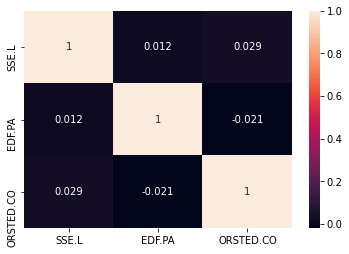

In [91]:
df_corr = pd.DataFrame({'SSE.L':sse_df['Returns'], 'EDF.PA':edf_df['Returns'], 'ORSTED.CO':orsted_df['Returns']})
corr = df_corr.corr()
sns.heatmap(corr, annot= True)
plt.show()

## Lagging Indicators

**Moving Average** Common technique to smooth out short-term fluctuations in stock prices to understand trends in price direction

In the below plot the orange line is the adjusted close price and the blue is the moving average.

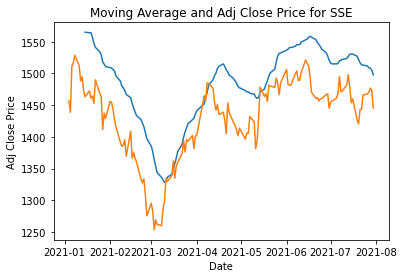

In [92]:
#cutoff = datetime.datetime.today() - datetime.timedelta(days=1)
cutoff = datetime.datetime(2021, 1, 1)

sse_df['Date'] = pd.to_datetime(sse_df['Date'], format='%Y/%m/%d')
sse_df = sse_df[sse_df['Date'] > cutoff]
sse_df['SMA_10'] = sse_df['Close'].rolling(window=10).mean()

plt.plot(sse_df['Date'], sse_df['SMA_10'])
plt.plot(sse_df['Date'], sse_df['Adj Close'])
plt.title("Moving Average and Adj Close Price for SSE")
plt.ylabel('Adj Close Price')
plt.xlabel('Date')
plt.show()


## Bollinger Plot

A way of visualising the dispersion in the moving average. Bands are upper and lower bands that are two stand deviations away from the moving average.

Allows trade to take advantage of fluctuations in price volatilities.

Text(0, 0.5, 'Adjusted Close Price')

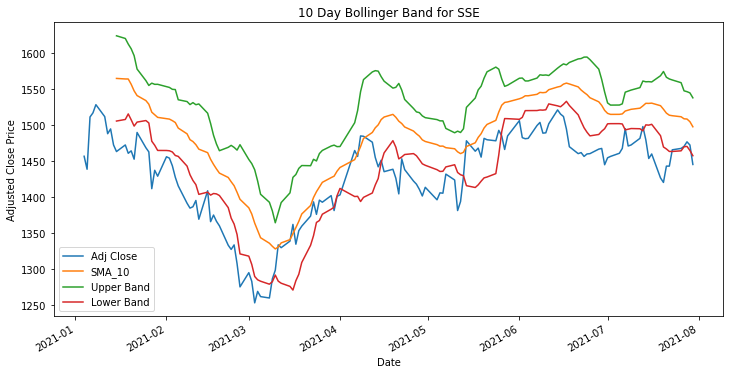

In [94]:
sse_df['SMA_10_STD'] = sse_df['Adj Close'].rolling(window=10).std()
sse_df['Upper Band'] = sse_df['SMA_10'] + (sse_df['SMA_10_STD'] * 2)
sse_df['Lower Band'] = sse_df['SMA_10'] - (sse_df['SMA_10_STD'] * 2)

sse_df.index = sse_df['Date']

sse_df[['Adj Close', 'SMA_10', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))

plt.title('10 Day Bollinger Band for SSE')
plt.ylabel('Adjusted Close Price')